# Desarrollo de un Sistema de Análisis de Noticias Salvadoreñas

## Objetivo General

El objetivo principal de este proyecto es aplicar los fundamentos de ciencia de datos para desarrollar un sistema integral de análisis de noticias salvadoreñas. Se abordarán diferentes etapas, desde la obtención de datos mediante web scraping hasta la implementación de modelos de aprendizaje automático y procesamiento del lenguaje natural, culminando con la creación de una interfaz interactiva utilizando Streamlit.


### Han contribuido a la elaboracion de este proyecto:

1. Nathaly Rebeca Bonilla Morales - UCA
2. Elmer Elias Chanchan - UFG
3. Diego Alejandro Manzano Pineda - Lab-Dat


# Modelo de Machine Learning para el análisis de noticias

Este código realiza un análisis de datos, entrenamiento de modelo, evaluación del modelo y visualización del árbol de decisiones, todo ello de manera paso a paso, usando los datos de noticias recolectados con el webscraping.

## Importar librerías

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import tree

-   **Pandas (`pd`):** Librería para manipulación y análisis de datos.
-   **CountVectorizer:** Utilizado para convertir una colección de documentos de texto en una matriz de recuentos de tokens.
-   **DecisionTreeClassifier:** Implementación de un clasificador de árbol de decisiones.
-   **Datetime:** Para trabajar con fechas y tiempos.
-   **sklearn.metrics:** Proporciona funciones para evaluar la precisión del modelo.
-   **Matplotlib (`plt`):** Biblioteca para visualización de datos.
-   **tree:** Funciones relacionadas con árboles de decisión.

  ## Cargar datos:

In [ ]:
df = pd.read_csv('datos_unicos3.csv')

- Se carga el conjunto de datos desde un archivo CSV llamado 'datos_unicos3.csv' y se almacena en un DataFrame llamado `df`.

**Dividir datos en características (X) y etiquetas (y):**

In [ ]:
X = df['Noticia']
y = df['Categoria']

- Se separan las características (`X`), que son las columnas de texto llamadas 'Noticia', y las etiquetas (`y`), que son las categorías de las noticias almacenadas en la columna `Categoria`.

**Preprocesamiento de texto:**

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

- Se utiliza `CountVectorizer` para tokenizar y convertir el texto en una matriz de recuentos.

**Crear y entrenar el modelo de árbol de decisiones:**

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier()

- Se crea un modelo de árbol de decisiones (`tree_model`) y se entrena con las características (`X`) y las etiquetas (`y`).

- Se evalúa el modelo con datos nuevo o no utilizados durante el entrenamiento

**Cargar datos de evaluación:**

In [ ]:
timestamp = datetime.now().strftime("%Y-%m-%d")
nombre_archivo = f'news_elsalvador_{timestamp}.csv'
df_eval = pd.read_csv(str(nombre_archivo))

- Se carga un nuevo conjunto de datos de evaluación desde un archivo CSV con un nombre que incluye la fecha y hora actual.

**Preprocesar datos de evaluación:**

In [ ]:
X_eval = df_eval['Noticia']
y_eval = df_eval['Categoria']
X_eval = vectorizer.transform(X_eval)

- Se realiza el mismo preprocesamiento de texto en los datos de evaluación como se hizo en los datos de entrenamiento.

**Realizar predicciones en datos de evaluación:**

In [ ]:
y_pred = tree_model.predict(X_eval)

- Se utilizan las características de evaluación (`X_eval`) para realizar predicciones usando el modelo entrenado.

**Calcular métricas de evaluación:**

In [ ]:
accuracy = accuracy_score(y_eval, y_pred)
precision = precision_score(y_eval, y_pred, average='macro', zero_division=1)
recall = recall_score(y_eval, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_eval, y_pred, average='macro', zero_division=1)

- Se calculan varias métricas de evaluación, como exactitud, precisión, recall y F1-score.

**Imprimir métricas:**

In [ ]:
print("Árbol de decisiones")
print("Exactitud: {:.2f}".format(accuracy))
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("")

Árbol de decisiones
Exactitud: 0.98
Precisión: 0.98
Recall: 0.97
F1-score: 0.97



- Se imprimen las métricas calculadas para evaluar el rendimiento del modelo.

## Visualizar el árbol de decisiones

- Se crea una visualización del árbol de decisiones utilizando la biblioteca Matplotlib.

- Se crea una leyenda que asigna colores a las diferentes clases en el árbol de decisiones.

- Finalmente, se muestra la visualización del árbol de decisiones con la leyenda.

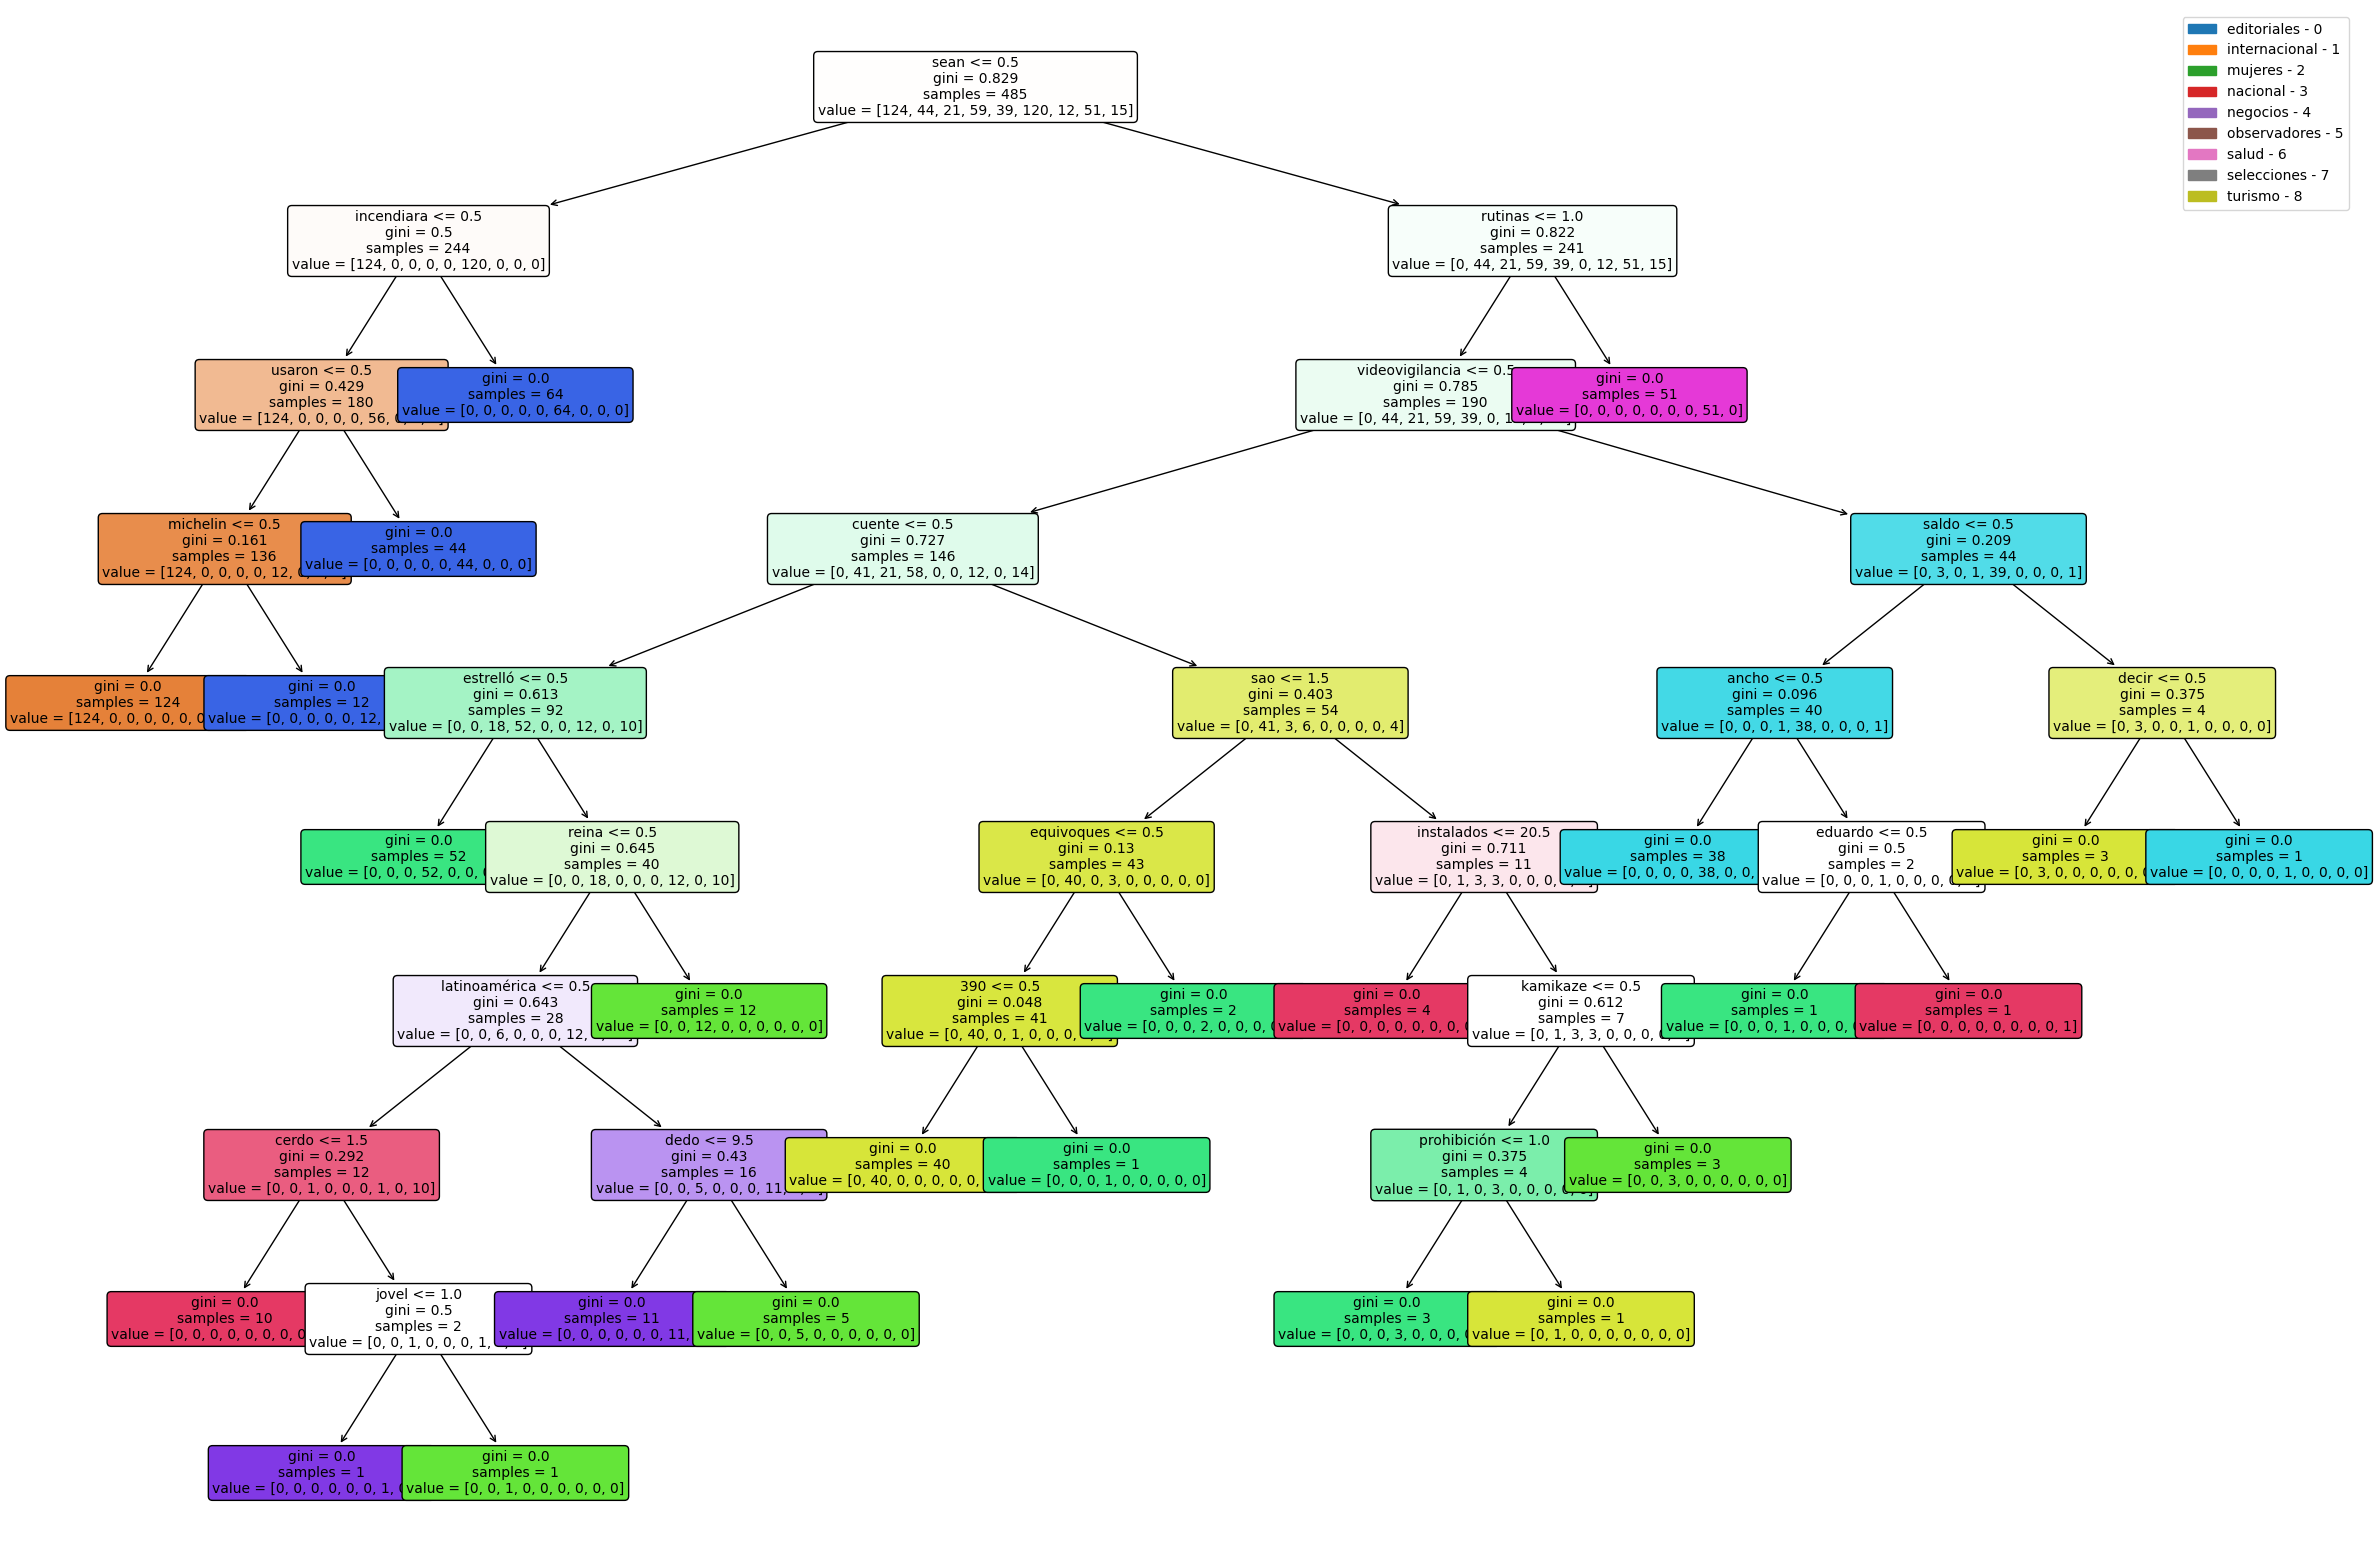

In [ ]:
plt.figure(figsize=(30, 20))
plt.title('Árbol de decisiones')
legend_fontsize = 10
tree.plot_tree(tree_model, filled=True, rounded=True, feature_names=list(vectorizer.vocabulary_.keys()), fontsize=legend_fontsize)
class_names = tree_model.classes_
class_colors = plt.cm.tab10(range(len(class_names)))
legend_labels = [f"{class_names[i]} - {i}" for i in range(len(class_names))]
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=class_colors[i]) for i in range(len(class_names))],
           labels=legend_labels, fontsize=legend_fontsize)
plt.show()

# Métricas adicionales

## Validación cruzada

1.  **Importación de bibliotecas:**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

-  `pandas` se utiliza para la manipulación de datos en formato de DataFrame.
-  `cross_val_score` se utiliza para realizar la validación cruzada.
-  `StratifiedKFold` se utiliza para dividir los datos en pliegues estratificados, garantizando que la proporción de clases se mantenga en cada pliegue.
-  `DecisionTreeClassifier` es un modelo de árbol de decisiones en scikit-learn.

2.  **Inicialización de StratifiedKFold:**

In [ ]:
stratkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  -   `StratifiedKFold` se inicializa con 5 pliegues, con mezcla (shuffle) de los datos y una semilla aleatoria (`random_state`) para reproducibilidad.

3.  **Realizar la Validación Cruzada y Calcular la Media de las Puntuaciones de Precisión:**

In [ ]:
cv_mean_accuracy = cross_val_score(tree_model, X, y, cv=stratkf, scoring='accuracy').mean()

-   `cross_val_score` realiza la validación cruzada.
-   `tree_model` es el modelo de árbol de decisiones previamente entrenado.
-   `X` son las características del conjunto de datos.
-   `y` es la variable objetivo.
-   `cv=stratkf` especifica el esquema de validación cruzada utilizando StratifiedKFold.
-   `scoring='accuracy'` indica que se calcula la precisión durante la validación cruzada.
-   `.mean()` calcula la media de las puntuaciones de precisión obtenidas en cada pliegue.

4.  **Imprimir los Resultados:**

In [ ]:
print("Model: Decision Tree")
print(f"Cross-Validation Mean Accuracy: {cv_mean_accuracy:.2f}")

Model: Decision Tree
Cross-Validation Mean Accuracy: 0.94


-   Se imprime el modelo utilizado.
-   Se imprime la precisión media de la validación cruzada con dos decimales.

## Predicciones de probabilidad y Etiquetas verdaderas

1.  **Importación de bibliotecas:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

-   `pandas` se usa para la manipulación de datos en formato de DataFrame.
-   `numpy` proporciona funciones para trabajar con matrices y operaciones numéricas.
-   `DecisionTreeClassifier` es un modelo de árbol de decisiones en scikit-learn.
-   `OneHotEncoder` se utiliza para codificar variables categóricas.

2.  **Cargar Datos del DataFrame:**

In [ ]:
timestamp = datetime.now().strftime("%Y-%m-%d")
nombre_archivo = f'news_elsalvador_{timestamp}.csv'
df = pd.read_csv(str(nombre_archivo))
# df = pd.read_csv('datos_unicos3.csv')

-   Se genera un nombre de archivo utilizando la fecha actual.
-   `pd.read_csv` carga los datos del archivo CSV en un DataFrame (`df`).

3.  **Seleccionar Características Categóricas:**

In [ ]:
X_categoricas = df[['Titulo', 'Resumen', 'Autor', 'Fecha', 'Noticia', 'Keywords', 'URL']]

-   `X_categoricas` contiene las características categóricas seleccionadas del DataFrame.

4.  **Crear Codificador One-Hot:**

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

-   Se crea un codificador one-hot con la opción `handle_unknown='ignore'`, que trata valores desconocidos durante la transformación.

5.  **Ajustar y Transformar Características Categóricas:**

In [ ]:
X_categoricas_codificadas = encoder.fit_transform(X_categoricas)

-   Se ajusta y transforma las características categóricas utilizando el codificador one-hot.

6.  **Concatenar Características Codificadas y Numéricas:**

In [ ]:
X = X_categoricas_codificadas.toarray()

-   Se convierte la representación dispersa (sparse) resultante de las características codificadas a un array numpy.

7.  **Obtener la Variable Objetivo:**

In [ ]:
y = df['Categoria']

-   `y` contiene la variable objetivo del DataFrame.

8.  **Entrenar el Árbol de Decisiones:**

In [ ]:
arbol = DecisionTreeClassifier()
arbol.fit(X, y)

DecisionTreeClassifier()

-   Se crea un modelo de árbol de decisiones y se entrena con las características (`X`) y la variable objetivo (`y`).

9.  **Generar Predicciones y Probabilidades:**

In [ ]:
predicciones = arbol.predict(X)
predicciones_probabilidad = arbol.predict_proba(X)

-   `predicciones` contiene las etiquetas predichas.
-   `predicciones_probabilidad` contiene las probabilidades predichas para cada clase.

10.  **Considerar Predicciones como Etiquetas Verdaderas Generadas:**

In [ ]:
etiquetas_verdaderas = predicciones

-   En este caso, se considera que las predicciones del árbol de decisiones son las etiquetas verdaderas generadas.

11.  **Imprimir Predicciones de Probabilidad y Etiquetas Verdaderas:**

In [ ]:
print("Predicciones de probabilidad:", predicciones_probabilidad)
print("Etiquetas Verdaderas:", etiquetas_verdaderas)

Predicciones de probabilidad: [[0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0.

-   Se imprimen las predicciones de probabilidad y las etiquetas verdaderas.

## Precision ponderada

1.  **Importación de Métricas de Evaluación:**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

-   Importa varias métricas de evaluación de clasificación desde scikit-learn.

2.  **Cálculo de Precisión, Recuperación y Puntuación F1 para Cada Clase:**

In [ ]:
precision = precision_score(etiquetas_verdaderas, predicciones, average=None)
recall = recall_score(etiquetas_verdaderas, predicciones, average=None)
f1 = f1_score(etiquetas_verdaderas, predicciones, average=None)

-   Calcula la precisión, recuperación y puntuación F1 para cada clase en el problema de clasificación.

3.  **Cálculo de Precisión Promedio (Macro y Ponderada):**

In [ ]:
precision_macro = precision_score(etiquetas_verdaderas, predicciones, average='macro')
precision_weighted = precision_score(etiquetas_verdaderas, predicciones, average='weighted')

-   Calcula la precisión promedio usando el enfoque macro y ponderado.


4.  **Impresión de Resultados:**


In [ ]:
for clase in range(len(precision)):
  print(f'Clase {clase}: Precisión={precision[clase]:.2f}, Recuperación={recall[clase]:.2f}, F1={f1[clase]:.2f}')

print(f'Precisión Macro: {precision_macro:.2f}')
print(f'Precisión Ponderada: {precision_weighted:.2f}')

Clase 0: Precisión=1.00, Recuperación=1.00, F1=1.00
Clase 1: Precisión=1.00, Recuperación=1.00, F1=1.00
Clase 2: Precisión=1.00, Recuperación=1.00, F1=1.00
Clase 3: Precisión=1.00, Recuperación=1.00, F1=1.00
Clase 4: Precisión=1.00, Recuperación=1.00, F1=1.00
Clase 5: Precisión=1.00, Recuperación=1.00, F1=1.00
Clase 6: Precisión=1.00, Recuperación=1.00, F1=1.00
Clase 7: Precisión=1.00, Recuperación=1.00, F1=1.00
Clase 8: Precisión=1.00, Recuperación=1.00, F1=1.00
Precisión Macro: 1.00
Precisión Ponderada: 1.00


-   Itera sobre cada clase e imprime las métricas de evaluación para cada clase (precisión, recuperación, F1).
-   Luego, imprime la precisión macro y ponderada.

## Matriz de confusion

1.  **Importación de Bibliotecas:**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

-   Importa las bibliotecas necesarias, como NumPy para operaciones numéricas, Matplotlib para visualización y Seaborn para crear gráficos estadísticos.


2.  **Cálculo de la Matriz de Confusión:**


In [ ]:
matriz_confusion = confusion_matrix(etiquetas_verdaderas, predicciones)

-   Calcula la matriz de confusión utilizando las etiquetas verdaderas (`etiquetas_verdaderas`) y las predicciones del modelo (`predicciones`).


3.  **Visualización de la Matriz de Confusión:**


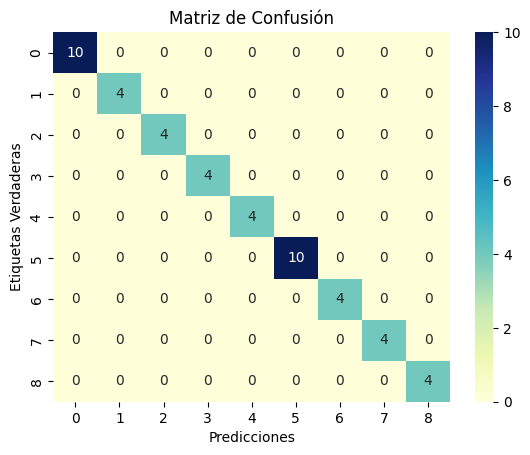

In [ ]:
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

-   Utiliza Seaborn para crear un mapa de calor de la matriz de confusión.
-   `annot=True` muestra los valores dentro de las celdas del mapa de calor.
-   `fmt='d'` formatea los valores como enteros.
-   `cmap='YlGnBu'` establece el esquema de color del mapa de calor.
-   Agrega un título y etiquetas a los ejes del gráfico.
-   Muestra el gráfico.
